# K-Nearest Neighbors
This assignment will use the Breast Cancer Wisconsin dataset. The goal of this assignment is to build a K-Nearest Neighbor model that best suits the data. You will need to determine the best value for 'k' and justify your answer. You will then report the accuracy of the learner. 

In [11]:
# Run this cell to load the dataset into a dataframe and split into training and testing sets. DO NOT CHANGE ANYTHING IN THIS CELL
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
target = df['target']
del df['target']
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

## Part 1
Please write your code in the following cell. Your job is to determine the best value for 'k'. Create multiple models using the numbers 1 through 40 and save the training and testing accuracy scores for each model. The training accuracy scores should be saved in an array called 'train_score'. The testing score should be saved in an array called 'test_score'. The range of 'k' values you are checking should be saved in a variable called 'ks'. If you do not use the exact names that have been specified the graphing function will not work. MAKE SURE YOU NAME EVERYTHING CORRECTLY. Once you have completed this task you can run the plotting code in next cell. You will use the resulting graph to answer the questions in part 2.

** When instantiating your model do NOT set the distance metric. The only hyperparamater you should be setting is 'n_neighbors' **

In [12]:
# Write your code in this cell
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
ks = range(1, 41)
train_score = []
test_score = []
for value in ks:
    knn = KNeighborsClassifier(n_neighbors=value)
    knn.fit(X_train, y_train)
    test_pred = knn.predict(X_test)
    test_score_value = metrics.accuracy_score(y_test, test_pred)  
    test_score.append(test_score_value)
    train_pred= knn.predict(X_train)
    train_score_value = metrics.accuracy_score(y_train, train_pred)
    train_score.append(train_score_value)
  

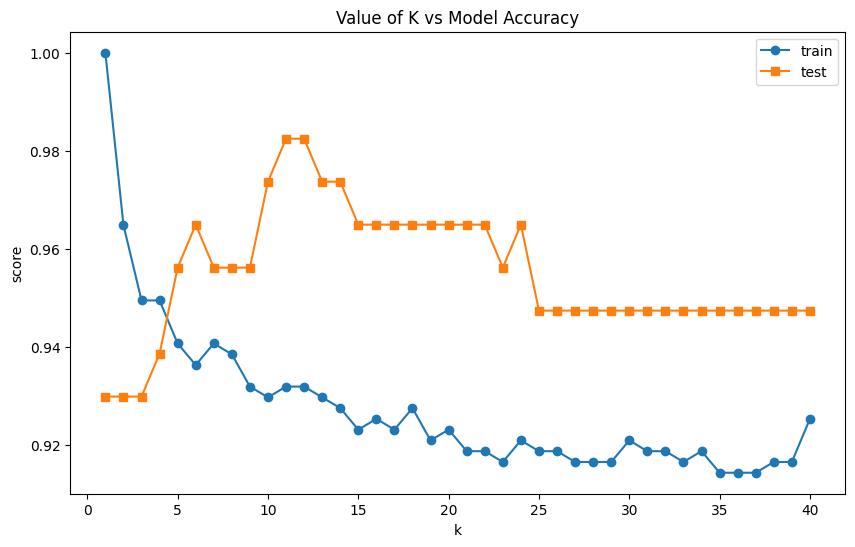

In [13]:
# Plotting the results - you don't need to change anything in this cell
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ks , train_score, 'o-', label='train')
plt.plot(ks , test_score, 's-', label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.title('Value of K vs Model Accuracy')
plt.legend()

## Part 2
Using the graph, answer the following questions in DETAIL. If your answers are not clearly explained you will lose credit

1) Which value of 'k' results in the least amount of variance. Explain your choice

This model has its least amount of variance when k is set to 5. At this point in the graph, the training and testing data are closest together. This means that at this point, the model would produce consistent estimates based on the training data. 

2) Which value of 'k' returns the greatest accuracy on the training data? Based how the KNN algorithm works, explain why this is the case. Can there be better values for 'k' when we want good accuracy on the training data?

When k=1, it returns the greatest accuracy. The reason for this is because when we look for the 'knn' we are looking for the closest neighbors. The closest neighbor/best value for the training data will always be the data point itself so it will produce an accuracy of 1.00. 

3) At which value of 'k' is the model most overfit? Explain.

When k=1 the model is most overfit. The model only checks one value in the training data so it won't be useful for making further predictions. 

4) Explain why there is a difference in performace between k=1 and k=40 for the training data

When k=1, the performance for the model is at the highest accuracy since we are only comparing it with the data point itself (and will therefore be classified accordingly). However, as you expand the number of nearest neighbors to compare it with where k=40, you now have expanded it far too large. At this point, there are too many neighbors to classify any differences. 

5) Explain why there is a difference in performace between k=1 and k=40 for the testing data

Using the testing data, when k=1 we are still only talking about one data point so if it is different the accuracy will be lower. However as k increases closer to k=40, we are able to differentiate based on the training data and the accuracy will find a 'middle ground' and be more representative of the true accuracy.

6) You are given 500 rows of new data that the model has never seen before. Which value of 'k' are you choosing? Justify your answer

I'd choose k=7 since it is the point where there is lowest variance and highest accuracy. 

#### Write Your responses in this cell

## Part 3
Repeat Part 1 using difference distance metrics. 


Step 1: Choose one of the distance merics from [this](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics) site (you can pick any metric besides 'cosine') and save the training and testing scores like in Part 1. Once you are done, graph the results. 

Step  2: In the next cell repeat the process setting the distance metric to 'cosine'. Graph the results.

Step 3: Once you have completed both graphs, write a comment explaining which metric you think is best to use on this dataset. Explain why distance metrics are important and why performance might vary when the distance metric is changed

** You must use the same variable names as you did in Part 1.The training accuracy scores should be saved in an array called 'train_score'. The testing score should be saved in an array called 'test_score'. The range of 'k' values you are checking should be saved in a variable called 'ks'. If you do not use the exact names that have been specified the graphing function will not work. MAKE SURE YOU NAME EVERYTHING CORRECTLY.  **

In [14]:
# Write your code for Step 1 in this cell
from sklearn.metrics import pairwise_distances
# An example of setting the distance metric is: model = KNeighborsClassifier(n_neighbors = k, metric='cosine')
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
ks = range(1, 41)
train_score = []
test_score = []
for value in ks:
    knn = KNeighborsClassifier(n_neighbors=value, metric='cityblock')
    knn.fit(X_train, y_train)
    test_pred = knn.predict(X_test)
    test_score_value = metrics.accuracy_score(y_test, test_pred)  
    test_score.append(test_score_value)
    train_pred= knn.predict(X_train)
    train_score_value = metrics.accuracy_score(y_train, train_pred)
    train_score.append(train_score_value)
  

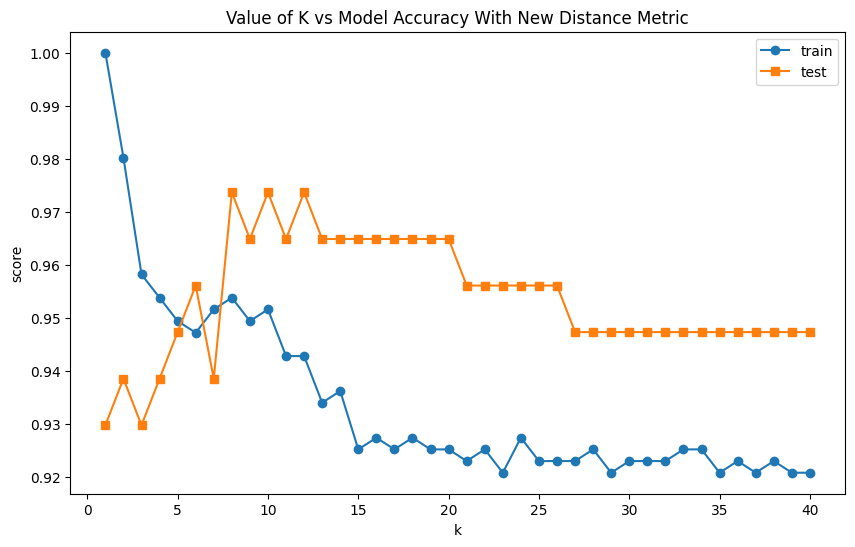

In [15]:
# Plotting the results - you don't need to change anything in this cell
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ks , train_score, 'o-', label='train')
plt.plot(ks , test_score, 's-', label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.title('Value of K vs Model Accuracy With New Distance Metric')
plt.legend()

In [16]:
# Write your code for Step 2 in this cell
from sklearn.metrics import pairwise_distances
# Write your code for Step 1 in this cell
from sklearn.metrics import pairwise_distances
# An example of setting the distance metric is: model = KNeighborsClassifier(n_neighbors = k, metric='cosine')
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
ks = range(1, 41)
train_score = []
test_score = []
for value in ks:
    knn = KNeighborsClassifier(n_neighbors=value, metric='cosine')
    knn.fit(X_train, y_train)
    test_pred = knn.predict(X_test)
    test_score_value = metrics.accuracy_score(y_test, test_pred)  
    test_score.append(test_score_value)
    train_pred= knn.predict(X_train)
    train_score_value = metrics.accuracy_score(y_train, train_pred)
    train_score.append(train_score_value)
  

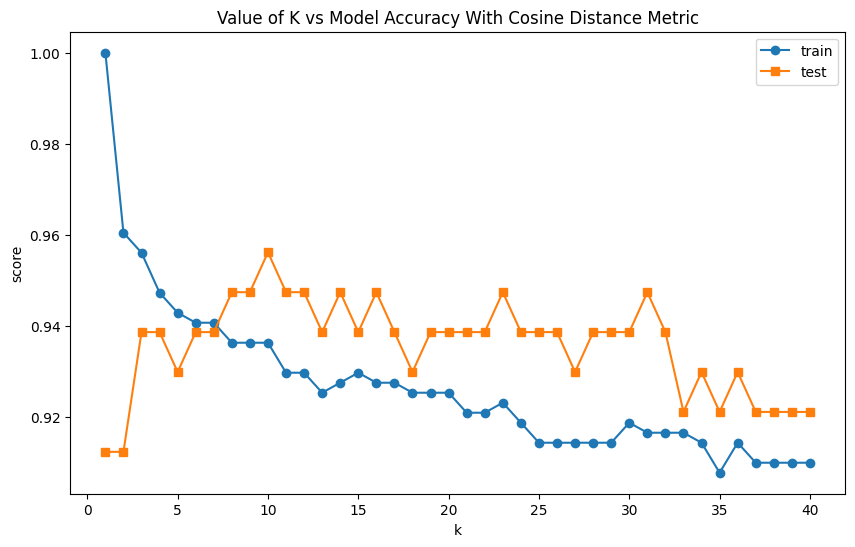

In [17]:
# Plotting the results - you don't need to change anything in this cell
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ks , train_score, 'o-', label='train')
plt.plot(ks , test_score, 's-', label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.title('Value of K vs Model Accuracy With Cosine Distance Metric')
plt.legend()

#### Write your answer to Step 3 in this cell

In [18]:
From this experiment, I'd say that we should use the 'cityblock' metrics. The reason is because using this
our data has the opportunity to reach a higher accuracy and there are certain points where the variance
would be low as well. The way that you measure distance matters because the graph (or algorithm) needs
to know what 'distance' is calculated based off of. If you change the calculation, the result (for accuracy and varience etc.) 
would change as well. 

SyntaxError: unterminated string literal (detected at line 1) (3094744059.py, line 1)